In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white',context='notebook',palette='deep')

Using TensorFlow backend.


In [2]:
train=pd.read_csv('train_digit.csv')

In [3]:
test=pd.read_csv('test_digit.csv')

In [4]:
Y_train=train['label']

In [5]:
X_train=train.drop(labels='label',axis=1)

In [6]:
del train

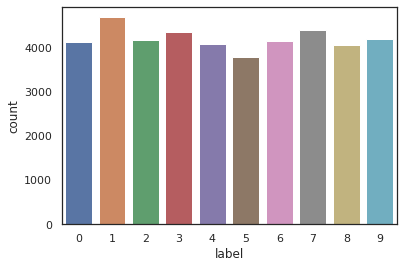

In [7]:
sns.countplot(Y_train)

In [8]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
X_train=X_train/255.0

In [12]:
test=test/255.0

In [13]:
X_train=X_train.values.reshape(-1,28,28,1)

In [14]:
test=test.values.reshape(-1,28,28,1)

In [15]:
Y_train=to_categorical(Y_train,num_classes=10)

In [16]:
random_seed=2

In [17]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=random_seed)

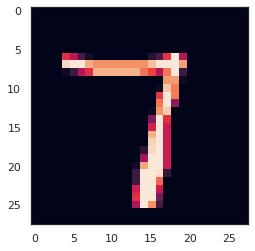

In [18]:
plt.imshow(X_train[1][:,:,0])

In [19]:
model=Sequential()

W0505 00:22:51.233654 139801928984384 deprecation_wrapper.py:119] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [20]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

W0505 00:22:51.502383 139801928984384 deprecation_wrapper.py:119] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0505 00:22:51.648790 139801928984384 deprecation_wrapper.py:119] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [21]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

In [22]:
model.add(MaxPool2D(pool_size=(2,2)))

W0505 00:22:51.923994 139801928984384 deprecation_wrapper.py:119] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [23]:
model.add(Dropout(0.25))

W0505 00:22:52.012994 139801928984384 deprecation_wrapper.py:119] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0505 00:22:52.056155 139801928984384 deprecation.py:506] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

In [25]:
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

In [26]:
model.add(MaxPool2D(pool_size=(2,2)))

In [27]:
model.add(Dropout(0.25))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(255,activation='relu'))

In [30]:
model.add(Dropout(0.5))

In [31]:
model.add(Dense(10,activation='softmax'))

In [32]:
optimizer=RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

In [33]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

W0505 00:22:53.137242 139801928984384 deprecation_wrapper.py:119] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0505 00:22:53.183143 139801928984384 deprecation_wrapper.py:119] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [34]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [35]:
epochs=1
batch_size=86

In [36]:
datagen=ImageDataGenerator(
 featurewise_center=False,
  samplewise_center=False,
featurewise_std_normalization=False,
 samplewise_std_normalization=False,
 zca_whitening=False,
 rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=False,
  vertical_flip=False)

In [37]:
datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


W0505 00:22:54.702162 139801928984384 deprecation.py:323] From /home/sachin/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1


In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
results=model.predict(test)

In [ ]:
results=np.argmax(results,axis=1)

In [ ]:
results=pd.Series(results,name='Label')

In [ ]:
submission_digit=pd.concat([pd.Series(range(1,28001),name='ImageId'),results],axis=1)

In [ ]:
submission_digit.to_csv("submissionDigRec",index=False)

In [ ]:
print(submission_digit)